<h2 style='color:green' align='center' >HUMAN GASTROINTESTINAL SYMPTOMS ANALYSIS SYSTEM<font size="5.5"></font></h2>


<h2 style='color:gray' ><font size="3">Loading the image set and splits using 70% of the data for training and the remaining 30% for testing</font></h2>


In [1]:
import os
import splitfolders 

input_dir = os.path.join(r'E:\Sem 4\Indivual Project\Dataset\kvasir-dataset-v2')
output_dir = os.path.join(r'E:\Sem 4\Indivual Project\Dataset\kvasir-dataset-v2_splitted')

splitfolders.ratio(input_dir, output=output_dir, seed=1337, ratio=(.75, .25), group_prefix=None) #change the test and train percentage

In [2]:
train_dir = os.path.join(r'E:\Sem 4\Indivual Project\Dataset\kvasir-dataset-v2_splitted\train')
test_dir = os.path.join(r'E:\Sem 4\Indivual Project\Dataset\kvasir-dataset-v2_splitted\val')

In [ ]:
from keras.applications.mobilenet_v2 import preprocess_input

<h2 style='color:gray' ><font size="3">ImageDataGenerator class which is used to perform image augmentation and flow_from_directory to read the images from a big numpy array and folders containing images.</font></h2>


In [3]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

def image_generator(train_parent_directory, test_parent_directory):
    
    train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=20,zoom_range=0.15,width_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')
    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=20,zoom_range=0.15,width_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')
    
    train_generator = train_datagen.flow_from_directory(train_parent_directory,
                                  target_size = (75,75),
                                  batch_size = 214,
                                  class_mode = 'categorical',
                                  subset='training')
 
    
    test_generator = test_datagen.flow_from_directory(test_parent_directory,
                                 target_size=(75,75),
                                 batch_size = 37,
                                 class_mode = 'categorical')    
    
    return train_generator, test_generator

In [4]:
train_generator, test_generator = image_generator(train_dir, test_dir)

Found 6400 images belonging to 8 classes.
Found 2400 images belonging to 8 classes.


In [5]:
classes=['dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis', 'normal-cecum', 'normal-pylorus', 'normal-z-line', 'polyps', 'ulcerative-colitis']

<h2 style='color:gray' ><font size="3">Preparing traing and testing data sets as X_train,y_train,X_test ,y_test</font></h2>

In [6]:
import numpy as np
import PIL.Image
import scipy

In [7]:
X_train=[]
for j in range(len(train_generator)):    
    for m in train_generator[j][0]: 
        X_train.append(m)
        

In [8]:
y_train=[]
for i in range(len(train_generator)):
    for k in train_generator[i][1]:  
            y_train.append(np.argmax(k))           


In [9]:
X_test=[]        
for j in range(len(test_generator)):    
    for m in test_generator[j][0]: 
        X_test.append(m)

In [10]:
y_test=[]
for i in range(len(test_generator)):
    for k in test_generator[i][1]:  
            y_test.append(np.argmax(k))
           

<h2 style='color:gray' ><font size="3">Converting the feature lists into a NumPy array.</font></h2>

In [11]:
X_train=np.array(X_train)
y_train=np.array(y_train)

X_test=np.array(X_test)
y_test=np.array(y_test)

In [12]:
X_train.shape

(6400, 75, 75, 3)

In [13]:
y_train.shape

(6400,)

<h2 style='color:gray' ><font size="3">Ploting sample images using matplotlib.pyplot</font></h2>

In [14]:
import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

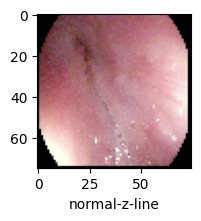

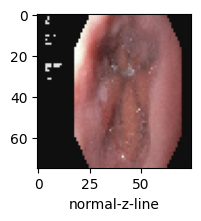

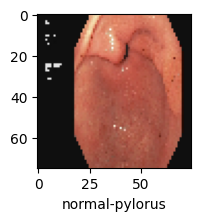

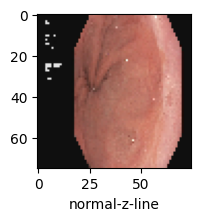

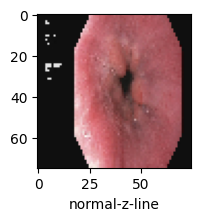

In [16]:
for i in range(5):    
    plot_sample(X_train, y_train, i)

<h2 style='color:gray' ><font size="3">Creating CNN usinga Sequential model by passing a list of layers to the Sequential constructor.</font></h2>

In [17]:
import tensorflow as tf
# from tensorflow.keras import layers, models
# from tensorflow.keras.layers import Dropout

In [ ]:
from keras.applications import mobilenet_v2

In [ ]:
from keras.layers import Input

In [ ]:
mobile = mobilenet_v2.MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

In [18]:
# cnn = models.Sequential([
#     layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(75, 75, 3)),
#     layers.MaxPooling2D((2, 2)),
    
#     layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
    
#     layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
    
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dropout(0.2),
#     #add 3 layers #add dropout
#     layers.Dense(8, activation='softmax')
# ])

In [ ]:
from keras.layers import AveragePooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense

<h2 style='color:gray' ><font size="3">Show model summary</font></h2>

In [ ]:
cnn=mobile.output
cnn=AveragePooling2D(pool_size=(7,7))(cnn)
cnn=Flatten(name='Flatten')(cnn)
cnn=Dense(128,activation='relu')(cnn)
cnn=Dropout(0.5)(cnn)
cnn=Dense(2,activation='sigmoid')(cnn)

In [19]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 73, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 128)        0

<h2 style='color:gray' ><font size="3"> Complieing the CNN model using Optimizer and loss function before training.</font></h2>

In [20]:
from sklearn.metrics import f1_score


cnn.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<h2 style='color:gray' ><font size="3">Fitting the dataset to train</font></h2>

In [ ]:
history=cnn.fit(X_train, y_train, epochs=25) #tuin ecope and  add backsize

Epoch 1/25
200/200 [==============================] - 22s 106ms/step - loss: 1.0960 - accuracy: 0.4950
Epoch 2/25
200/200 [==============================] - 22s 108ms/step - loss: 0.7781 - accuracy: 0.6444
Epoch 3/25
200/200 [==============================] - 19s 97ms/step - loss: 0.7071 - accuracy: 0.6805
Epoch 4/25
200/200 [==============================] - 19s 97ms/step - loss: 0.6778 - accuracy: 0.7009
Epoch 5/25
200/200 [==============================] - 20s 98ms/step - loss: 0.6161 - accuracy: 0.7264
Epoch 6/25
200/200 [==============================] - 19s 96ms/step - loss: 0.5651 - accuracy: 0.7455
Epoch 7/25
200/200 [==============================] - 20s 98ms/step - loss: 0.5689 - accuracy: 0.7453
Epoch 8/25
200/200 [==============================] - 19s 97ms/step - loss: 0.5287 - accuracy: 0.7669
Epoch 9/25
200/200 [==============================] - 19s 95ms/step - loss: 0.5143 - accuracy: 0.7733
Epoch 10/25
200/200 [==============================] - 20s 97ms/step - loss: 0.4

<h2 style='color:gray' ><font size="3">Finding  model accuracy </font></h2>

In [ ]:
accuracy=cnn.evaluate(X_test,y_test)[1]
print("\nModel Accuracy =", (accuracy * 100.0),"%") 

In [ ]:
# calculates f1 for 1:100 dataset with 95tp, 5fn, 55fp
from sklearn.metrics import f1_score
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(5)] + [1 for _ in range(95)]
pred_neg = [1 for _ in range(55)] + [0 for _ in range(9945)]
y_pred = pred_pos + pred_neg
# calculate score
score = f1_score(y_true, y_pred, average='binary')
print('F-Measure: %.3f' % score)

<h2 style='color:gray' ><font size="3">Visualizeing loss history </font></h2>

In [ ]:
print(history.history.keys())

In [ ]:
# Get accuracy and test loss histories
loss = history.history['loss']
accuracy = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(loss) + 1)

# Visualize loss history
plt.plot(epoch_count, loss, 'r--')
plt.plot(epoch_count, accuracy, 'b-')
plt.legend(['Epoch Loss', 'Epoch Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Histories (Accuracy and Loss)')
plt.show();

<h2 style='color:gray' ><font size="3">Checking model prediction</font></h2>

In [ ]:
y_pred = cnn.predict(X_test)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]

In [ ]:
#Correct Anomalies 
plot_sample(X_test, y_test,4)

In [ ]:
#Predict Anomalies by model
classes[y_classes[4]]

<h2 style='color:gray' ><font size="3">Computing confusion matrix to evaluate the accuracy of a classification.</font></h2>

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_classes)
cm

<h2 style='color:gray' ><font size="3">Visualizing model accuracy using seaborn heatmap</font></h2>

In [ ]:
import seaborn as sn

plt.figure(figsize=(14,7))
sn.heatmap(cm,annot=True)

plt.ylabel('( y_test )')
plt.xlabel('( y_predicted )')
plt.xticks(range(len(classes)),classes, rotation=20)
plt.yticks(range(len(classes)),classes,rotation=0)
